In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.cluster import KMeans


from sklearn import preprocessing
from sklearn import metrics


In [2]:
%matplotlib inline

In [11]:
dataset = load_boston()

df = pd.DataFrame(data=dataset.data,
                  columns=dataset.feature_names)
print( df )

df_scaled = pd.DataFrame(data=preprocessing.scale(dataset.data),columns=dataset.feature_names)


         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

In [6]:
print(df_scaled)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.417713  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.415269 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.415272 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.414680 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.410409 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
5   -0.414974 -0.487722 -1.306878 -0.272599 -0.835284  0.207096 -0.351157   
6   -0.408169  0.048772 -0.476654 -0.272599 -0.265154 -0.388411 -0.070229   
7   -0.401618  0.048772 -0.476654 -0.272599 -0.265154 -0.160466  0.978808   
8   -0.393853  0.048772 -0.476654 -0.272599 -0.265154 -0.931206  1.117494   
9   -0.398650  0.048772 -0.476654 -0.272599 -0.265154 -0.399808  0.616090   
10  -0.392264  0.048772 -0.476654 -0.272599 -0.265154  0.131589  0.914799   
11  -0.404771  0.048772 -0.476654 -0.272599 -0.265154 -0.392685  0.509409   

In [7]:
#print(dataset.DESCR)

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
df_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,0.000000,6.319056e-17,-3.145486e-15,-2.106352e-17,2.752300e-15,-1.150770e-14,-1.137430e-15,7.582867e-16,5.616939e-17,5.616939e-17,-1.022283e-14,8.593916e-15,-5.897786e-16
std,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-0.417713,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-0.408896,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-0.388582,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,0.006248,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.941735,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


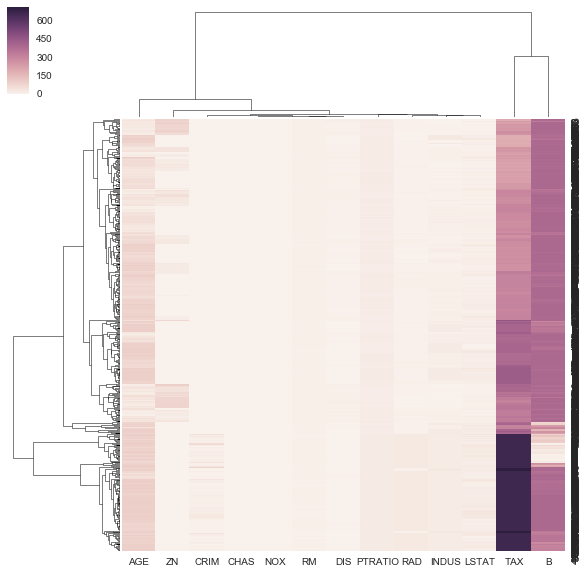

In [9]:
sns.clustermap(df,
               method='average',
               metric='euclidean',
               z_score=None,
               standard_scale=None)

In [12]:
clust_model = KMeans(n_clusters=4,
                     init='k-means++')
clust_labels = clust_model.fit_predict(df)
print( clust_model.cluster_centers_)
print(clust_labels)


[[  1.09105113e+01   5.32907052e-15   1.85725490e+01   7.84313725e-02
    6.71225490e-01   5.98226471e+00   8.99137255e+01   2.07716373e+00
    2.30196078e+01   6.68205882e+02   2.01950980e+01   3.71803039e+02
    1.78740196e+01]
 [  2.41047910e-01   1.78171642e+01   6.66858209e+00   7.46268657e-02
    4.83398134e-01   6.46544776e+00   5.57052239e+01   4.87356007e+00
    4.31343284e+00   2.76548507e+02   1.78731343e+01   3.87814067e+02
    9.53802239e+00]
 [  1.49558803e+01  -5.32907052e-15   1.79268421e+01   2.63157895e-02
    6.73710526e-01   6.06550000e+00   8.99052632e+01   1.99442895e+00
    2.25000000e+01   6.44736842e+02   1.99289474e+01   5.77863158e+01
    2.04486842e+01]
 [  7.41290612e-01   9.94897959e+00   1.29837755e+01   6.12244898e-02
    5.82234694e-01   6.18984694e+00   7.32887755e+01   3.33182143e+00
    4.82653061e+00   4.06081633e+02   1.76663265e+01   3.71664286e+02
    1.27148980e+01]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1

In [11]:
silhouette_avg = metrics.silhouette_score(df,
                                          clust_labels)

print(silhouette_avg)

0.568219170853


In [12]:
target_values = dataset.target
#target_values = scale(dataset.target)

target_labels = pd.qcut(x=target_values,q=4,labels=[1,2,3,4])
class_labels = target_labels.astype('int32') - 1

print(class_labels)

[2 2 3 3 3 3 2 3 0 1 0 1 2 1 1 1 2 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 1 2 3 3 3 3 2 1 1 1 0 0 1 1 1 2 2 1 3 2 3 2 1 1 0 2 2 3 2 1 2 1 1 2 2 2 2
 2 2 1 1 1 1 3 2 2 2 2 3 2 2 2 3 2 2 2 2 1 3 2 3 3 3 3 3 1 1 1 1 1 1 1 1 2
 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 0 0 1 0 1 1 2 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 2 1 0 1 0 0 0 3 2 2 3 3 3 3 2 2 3 2 2 2 1 1 2 2 2 3 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 2 2 2 1 2 1 2 3 2 2 2 3 2 2 3 2
 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 2 2 2 1 2 2 1 1 2 1 2 3 2 2 3 3 2 1 3 3 3
 3 3 3 3 3 3 2 3 3 3 1 1 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 2 2 3 3 3 2 2 3
 3 1 2 3 2 2 3 3 3 3 3 3 2 1 0 2 1 2 2 0 1 1 2 1 2 2 1 1 2 2 2 2 1 2 1 1 1
 2 1 1 1 1 1 1 1 3 0 2 3 1 1 2 2 3 2 2 1 3 1 1 1 2 2 2 2 1 1 0 2 3 2 2 3 3
 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 1 3 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 2 1 1 1 1 1 1 1 2 3 0 0 0 0 0 2 2
 2 2 2 1 1 1 1 0 0 0 0 1 

In [13]:
h_score = metrics.homogeneity_score(class_labels,
                                    clust_labels)
c_score = metrics.completeness_score(class_labels,
                                     clust_labels)
r_score = metrics.adjusted_rand_score(class_labels,
                                      clust_labels)
mi_score = metrics.adjusted_mutual_info_score(class_labels,
                                              clust_labels)

print(h_score,
      c_score,
      r_score,
      mi_score)

0.136527129182 0.161503460454 0.106793348941 0.13087186721


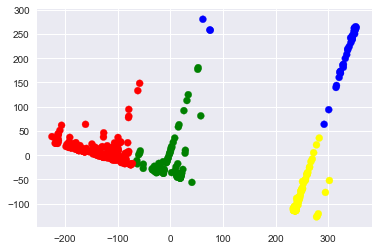

In [14]:
from sklearn.decomposition import PCA

colormap = np.array(['red', 'yellow', 'blue', 'green'])

pca_col = PCA(2).fit_transform(df)
plt.scatter(x=pca_col[:,0],
            y=pca_col[:,1],
            c=colormap[clust_labels])
plt.show()

In [15]:
df['MEDV'] = dataset.target
#df_scaled['MEDV'] = preprocessing.scale(dataset.target)

df['CLUST'] = clust_labels
#df_scaled['ClUST'] = clust_labels

df['CLASS'] = class_labels

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CLUST,CLASS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0,2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0,2
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0,3
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0,3
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0,3


In [17]:
C0 = df.loc[df['CLUST'] == 0]

In [18]:
C0.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CLUST,CLASS
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0,268.000000
mean,0.241048,17.817164,6.668582,0.074627,0.483398,6.465448,55.705224,4.873560,4.313433,276.548507,17.873134,387.814067,9.538022,25.865299,0.0,1.981343
std,0.321518,26.758529,4.398602,0.263280,0.059580,0.679890,26.604912,1.908752,1.839711,39.544143,2.047988,18.591322,5.300122,8.282685,0.0,0.949880
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.973000,2.900000,1.757200,1.000000,187.000000,12.600000,232.600000,1.980000,11.900000,0.0,0.000000
25%,0.050770,0.000000,3.970000,0.000000,0.434500,5.967500,33.175000,3.476825,3.000000,247.000000,16.600000,386.825000,5.870000,20.575000,0.0,1.000000
50%,0.109930,0.000000,6.060000,0.000000,0.488000,6.342000,56.300000,4.458300,4.000000,284.000000,18.100000,393.365000,8.245000,23.450000,0.0,2.000000
75%,0.300237,25.000000,8.140000,0.000000,0.524000,6.818500,79.375000,6.113250,5.000000,307.000000,19.100000,396.900000,11.725000,29.675000,0.0,3.000000
max,2.635480,100.000000,25.650000,1.000000,0.647000,8.725000,100.000000,12.126500,8.000000,351.000000,22.000000,396.900000,30.810000,50.000000,0.0,3.000000


In [19]:
L0 = df.loc[df['CLASS'] == 0]

In [20]:
L0.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CLUST,CLASS
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.0
mean,10.907463,0.393701,17.018189,0.039370,0.668157,5.886496,92.868504,2.277718,17.141732,567.834646,19.651969,285.830315,21.067795,12.726772,1.354331,0.0
std,14.238249,2.698934,4.641761,0.195244,0.094925,0.592155,9.240411,1.173490,9.479907,153.257837,1.774996,143.964769,5.972431,2.974533,0.913110,0.0
min,0.024980,0.000000,1.890000,0.000000,0.448000,4.138000,37.800000,1.137000,1.000000,188.000000,14.700000,0.320000,7.880000,5.000000,0.000000,0.0
25%,1.400920,0.000000,18.100000,0.000000,0.603000,5.550500,90.550000,1.598450,5.000000,403.000000,20.200000,171.090000,17.115000,10.850000,1.000000,0.0
50%,7.672020,0.000000,18.100000,0.000000,0.679000,5.950000,95.400000,1.866200,24.000000,666.000000,20.200000,363.020000,19.920000,13.400000,1.000000,0.0
75%,13.795750,0.000000,18.100000,0.000000,0.713000,6.342000,98.850000,2.334800,24.000000,666.000000,20.200000,396.660000,24.275000,15.000000,2.000000,0.0
max,88.976200,25.000000,27.740000,1.000000,0.871000,7.313000,100.000000,6.818500,24.000000,711.000000,21.200000,396.900000,37.970000,17.000000,3.000000,0.0


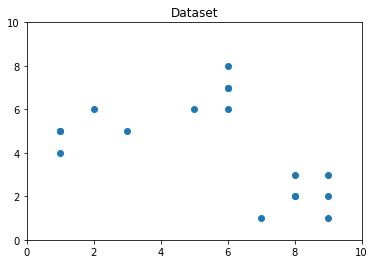

0.611342436871 2
0.712207938329 3
0.638994864313 4
0.469833743758 5


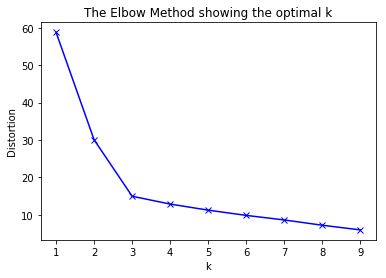

[58.7809550536427, 30.068603074789642, 14.993812485620728, 12.898136040931194, 11.279861781080591, 9.8749652083830348, 8.6593190310305985, 7.2451054686575054, 5.9999999999999991]


In [10]:
 #clustering dataset
# determine k using elbow method
 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 
 
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
 
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()
 
# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.cluster import KMeans


from sklearn import preprocessing
from sklearn import metrics
df_scaled=X
for i in range(2,6):
    clust_model = KMeans(n_clusters=i,
                     init='k-means++')
    clust_labels = clust_model.fit_predict(df_scaled)
    silhouette_avg = metrics.silhouette_score(df_scaled,clust_labels)
    print(silhouette_avg ,i)
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #print(k,kmeanModel)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )
    #print(distortions,"vgv", X.shape[0],cdist(X, kmeanModel.cluster_centers_, 'euclidean'),"a",sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)),kmeanModel.cluster_centers_,"bb",X)
    #print("--------------------------------------------------------------------------------")
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [12]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.cluster import KMeans


from sklearn import preprocessing
from sklearn import metrics

for i in range(2,6):
    clust_model = KMeans(n_clusters=i,
                     init='k-means++')
    clust_labels = clust_model.fit_predict(df_scaled)
    silhouette_avg = metrics.silhouette_score(df_scaled,clust_labels)
    print(silhouette_avg ,i)
    
    print("homogeneity_score",sklearn.metrics.homogeneity_score(dataset.target, clust_labels))
    print("completeness_score",sklearn.metrics.completeness_score(dataset.target, clust_labels))

0.359977342374 2
homogeneity_score 0.0795512108352
completeness_score 0.641175703038
0.257259122893 3
homogeneity_score 0.12901506428
completeness_score 0.648253877895
0.289677005161 4
homogeneity_score 0.149924201838
completeness_score 0.653728080465
0.24761508904 5
homogeneity_score 0.179201696764
completeness_score 0.630928261314


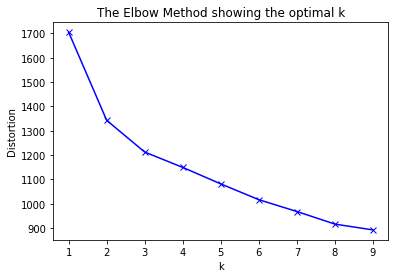

[1704.722646739031, 1342.6412004904998, 1212.4078144529649, 1149.3911446583568, 1081.5831067538804, 1016.7245229004521, 968.26508998782083, 916.46566207794592, 892.6867800301444]


In [13]:
distortions = []
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
X=df_scaled
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #print(k,kmeanModel)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )
    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)